*General dependencies*

In [1]:
#Change it accoprding to your Hardware
#If you have a NVIDIA GPU, read the "install TF and OpenCV with CUDA" section on this notebook
TF_GPU = 1

In [2]:
#!pip install numpy
#!pip install matplotlib

#We will use virtualenv to create a separate envinment
#!pip install virtualenv

In [3]:
#Activating the separate environment

#!virtualenv TF_GPU

**Install TensorFlow and OpenCV with CUDA**

https://thinkinfi.com/conda-install-tensorflow-gpu-jupyter/

OBS: For Python 3.8.X. If you need the last version will be necessary recompile TF or use Linux.

- First: Install CUDA Drivers
  
TensorFlow and CUDA drivers are directly conected, you need to install the correct version of each one.
In the link below, you can find a tabble with the TF version and Supported CUDA
https://www.tensorflow.org/install/source


For this project, we will be using TD 2.10, because they are not compiling TF-GPU for Windows after the 2.10 version.
Dur to this, we will need to install CUDA 11 drivers.

You can download the NVIDIA CUDA drivers from the link: 

https://developer.nvidia.com/cuda-11-8-0-download-archive?target_os=Windows&target_arch=x86_64&target_version=11&target_type=exe_local

- Install cuDNN

  
  To have support of Deep Neural Network through CUDA, you need to install cuDNN.
  cuDNN is compiled for the specific CUDA driver version too, you can download the correct version for you CUDA installation from the link (for CUDA 11 in our case):
  
  https://developer.nvidia.com/rdp/cudnn-archive


  After, extract the files, and copy each dll and .h from its folder to the same folder in CUDA Driver Directory installation.

  For example:
      Copy all "lib\x64\*.dll" to "C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8\lib"


      Do it for the include and lib files too.

  Now, you are prepared to install TensorFlow GPU.

- Install TensorFlow-GPU

  TF-gpu is only disponible in its 2.10 verion of Windows, that is only compatible with Python 3.7-3.9.
 
  !pip install tensorflow-gpu==2.10

- OpenCV Cuda

    https://medium.com/analytics-vidhya/build-opencv-from-source-with-cuda-for-gpu-access-on-windows-5cd0ce2b9b37

  Download CMake: https://cmake.org/download/
  
  Download OpenCV Source Code: https://opencv.org/releases/
  
  Install CMake
  
  Extract OpenCD SRC in a folder
  
  Create "build" directory
  
  Open the OpenCVDetectPython.cmake into "cmake" dir and
  
  

In [4]:
try:
    import tensorflow as tf
    from tensorflow import keras
except ImportError:
    #Installing TensorFlow GPU 2.10 to use CUDA 11
    if TF_GPU:
        !pip install tensorflow-gpu==2.10
    else:
        !pip install tensorflow

    import tensorflow as tf
    from tensorflow import ke
    

In [5]:
#Importing tensorflow and keras API
#from tensorflow import keras

# Importing numpy and pyplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import pandas as pd
from itertools import islice
#import cv2  # ou from PIL import Image

In [6]:
print("ensorFlow Version:", tf.__version__)    #Checking TensorFlow version
print("CUDA support:", tf.test.is_built_with_cuda())  #Checking CUDA support
print("GPU:", tf.config.list_physical_devices('GPU')) #Checking available GPUs
print("---------------------------------------------")
print("OpenCV Version:", cv2.__version__) 
print("CUDA support:",cv2.cuda.getCudaEnabledDeviceCount())

ensorFlow Version: 2.10.0
CUDA support: True
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
---------------------------------------------
OpenCV Version: 4.8.0
CUDA support: 1


In [7]:
import sys
print(sys.executable)

D:\Program Files\Python38\python.exe


In [8]:
#Loading the CSV file
df = pd.read_csv('../BirdsDataset/birds.csv')

In [9]:
#Checking the first 4 lines
df.head(4)

,class id,filepaths,labels,data set,scientific name
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [10]:
# Crie uma máscara booleana para identificar as linhas que estão no conjunto de treinamento
train_mask = df['filepaths'].str.contains('train/')
test_mask = df['filepaths'].str.contains('test/')
valid_mask = df['filepaths'].str.contains('valid/')

# Use a máscara para criar dois DataFrames separados
train_data = df[train_mask]
test_data = df[test_mask]
valid_data = df[valid_mask]

# Agora, train_data conterá os dados do conjunto de treinamento
# e test_data conterá os dados do conjunto de teste, mantendo as outras colunas.

# Exemplo de uso:
print("Dados de treinamento:")
print(train_data.head())

print("\nDados de teste:")
print(test_data.head())

print("\nDados de teste:")
print(valid_data.head())

Dados de treinamento:
   class id                      filepaths           labels data set  \
0         0  train/ABBOTTS BABBLER/001.jpg  ABBOTTS BABBLER    train   
1         0  train/ABBOTTS BABBLER/007.jpg  ABBOTTS BABBLER    train   
2         0  train/ABBOTTS BABBLER/008.jpg  ABBOTTS BABBLER    train   
3         0  train/ABBOTTS BABBLER/009.jpg  ABBOTTS BABBLER    train   
4         0  train/ABBOTTS BABBLER/002.jpg  ABBOTTS BABBLER    train   

        scientific name  
0  MALACOCINCLA ABBOTTI  
1  MALACOCINCLA ABBOTTI  
2  MALACOCINCLA ABBOTTI  
3  MALACOCINCLA ABBOTTI  
4  MALACOCINCLA ABBOTTI  

Dados de teste:
       class id                   filepaths           labels data set  \
84635         0  test/ABBOTTS BABBLER/1.jpg  ABBOTTS BABBLER     test   
84636         0  test/ABBOTTS BABBLER/2.jpg  ABBOTTS BABBLER     test   
84637         0  test/ABBOTTS BABBLER/3.jpg  ABBOTTS BABBLER     test   
84638         0  test/ABBOTTS BABBLER/4.jpg  ABBOTTS BABBLER     test   
84639  

In [11]:
df.shape[0]

89885

In [12]:
#classe_names
class_names = df['labels'].unique()
class_names.shape[0]

525

In [13]:
train_data.shape[0]

84635

In [14]:
n_images_per_class_to_load = 1000 # df.shape[0] #Change it for the number of images that you would like to load
n_class =20 # class_names.shape[0]

In [15]:
#Creating a PATH index to load the images and construct the train dataset
#for index, row in df.iterrows():
i=0

train_images = []
train_labels = []
for class_id in range(n_class):  # O range inclui até 200
    filtered_images = train_data[train_data['class id'] == class_id]
    
    if n_images_per_class_to_load > len(filtered_images):
        n_images_per_class_to_load = len(filtered_images)
    
    for index, row in islice(filtered_images.iterrows(), n_images_per_class_to_load):                  
            path='../BirdsDataset/' + row['filepaths']    #Creating the path
            image_path = os.path.join(path)               #Creating the OS Path to the image        
            image = cv2.imread(image_path)
            
            height, width, channels = image.shape    
            if i < len(train_images):
                train_images[i] = image
                train_labels[i] = int(row['class id'])
            else:
                train_images.append(image)   
                train_labels.append(int(row['class id']))
            i+=1

In [16]:

#train_images = np.array(train_images)

In [17]:
#Creating a PATH index to load the images and construct the train dataset
#for index, row in df.iterrows():


i=0

test_images = []
test_labels = []
for class_id in range(n_class):  # O range inclui até 200
    filtered_images = test_data[test_data['class id'] == class_id]
    
    if n_images_per_class_to_load > len(filtered_images):
        n_images_per_class_to_load = len(filtered_images)
    
    for index, row in islice(filtered_images.iterrows(), n_images_per_class_to_load):                  
            path='../BirdsDataset/' + row['filepaths']    #Creating the path
            image_path = os.path.join(path)               #Creating the OS Path to the image        
            image = cv2.imread(image_path)
            
            height, width, channels = image.shape    
            if i < len(test_images):
                test_images[i] = image
                test_labels[i] = int(row['class id'])
            else:
                test_images.append(image)   
                test_labels.append(int(row['class id']))
            i+=1

In [18]:
#Creating a PATH index to load the images and construct the train dataset
#for index, row in df.iterrows():

i=0

valid_images = []
valid_labels = []
for class_id in range(n_class):  # O range inclui até 200
    filtered_images = valid_data[valid_data['class id'] == class_id]
    
    if n_images_per_class_to_load > len(filtered_images):
        n_images_per_class_to_load = len(filtered_images)
    
    for index, row in islice(filtered_images.iterrows(), n_images_per_class_to_load):                  
            path='../BirdsDataset/' + row['filepaths']    #Creating the path
            image_path = os.path.join(path)               #Creating the OS Path to the image        
            image = cv2.imread(image_path)
            
            height, width, channels = image.shape    
            if i < len(valid_images):
                valid_images[i] = image
                valid_labels[i] = int(row['class id'])
            else:
                valid_images.append(image)   
                valid_labels.append(int(row['class id']))
            i+=1

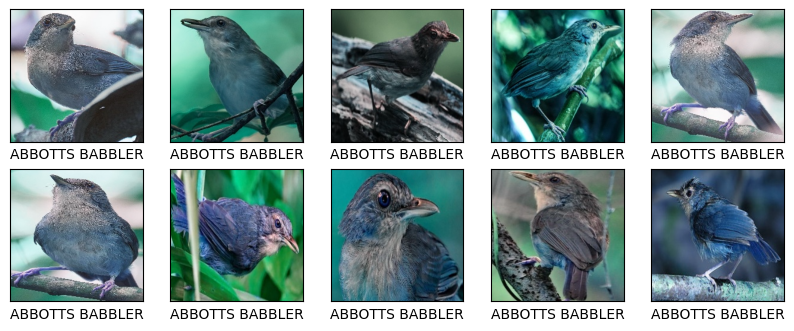

In [19]:
#Printing the first 25 images of the train dataset with its classification
#in grid of 5 by 5
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

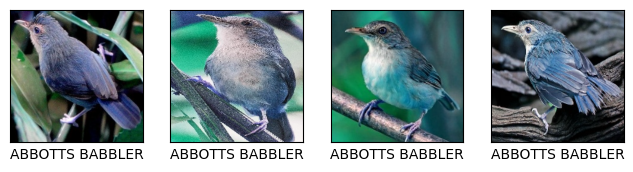

In [20]:
#Printing the first 25 images of the train dataset with its classification
#in grid of 5 by 5
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

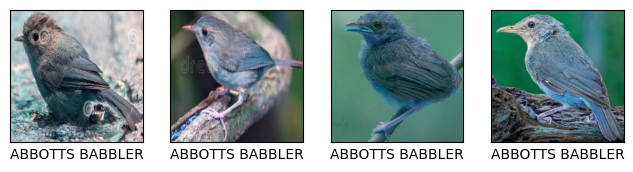

In [21]:
#Printing the first 25 images of the train dataset with its classification
#in grid of 5 by 5
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(valid_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
#Here, we are defining the model.
#The first layer will have an input of 28x28 (784) length
#The second layer will have 128 neurons/nodes with an activation pattern "relu"
#The third layer will have 10 neurons/nodes with an activation pattern "softmax" - This will be our output. Each neuron is on class.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(height, width, channels)),  # Camada de entrada ajustada
    keras.layers.Dense(1024, activation='relu'),    
    keras.layers.Dense(768, activation='relu'),
    #keras.layers.Dense(n_class*4, activation='relu'),    
    #keras.layers.Dense(n_class*2, activation='relu'),        
    keras.layers.Dense(n_class, activation='softmax')
])

In [23]:
model.compile(optimizer='adamax',  
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Converter train_images para um NumPy array
train_images = np.array(train_images)
test_images = np.array(train_images)
valid_images = np.array(train_images)

# Converter train_labels para um NumPy array
train_labels = np.array(train_labels)
test_labels = np.array(train_labels)
valid_labels = np.array(train_labels)

In [25]:
print(train_images.shape)
print(train_labels.shape)

(2751, 224, 224, 3)
(2751,)


In [26]:
#Training the model with 10 iterations. More iteration may increase the accuracy


model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
86/86 [==============================] - 4s 36ms/step - loss: 11374.5137 - accuracy: 0.0963
Epoch 2/10
86/86 [==============================] - 3s 35ms/step - loss: 998.4365 - accuracy: 0.2083
Epoch 3/10
86/86 [==============================] - 3s 35ms/step - loss: 532.7963 - accuracy: 0.2984
Epoch 4/10
86/86 [==============================] - 3s 35ms/step - loss: 412.8698 - accuracy: 0.3388
Epoch 5/10
86/86 [==============================] - 3s 35ms/step - loss: 301.9294 - accuracy: 0.3784
Epoch 6/10
86/86 [==============================] - 3s 35ms/step - loss: 251.0252 - accuracy: 0.3806
Epoch 7/10
86/86 [==============================] - 3s 35ms/step - loss: 239.8858 - accuracy: 0.3926
Epoch 8/10
86/86 [==============================] - 3s 35ms/step - loss: 199.0290 - accuracy: 0.3951
Epoch 9/10
86/86 [==============================] - 3s 35ms/step - loss: 184.2810 - accuracy: 0.4151
Epoch 10/10
86/86 [==============================] - 3s 35ms/step - loss: 170.2126 - accu

In [27]:
#Here, we can verify the accuracy of the trained model

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

86/86 - 1s - loss: 133.4676 - accuracy: 0.3969 - 645ms/epoch - 7ms/step

Test accuracy: 0.39694657921791077


In [28]:
#Making some predctions based on the "test images" dataset
predictions = model.predict(test_images)

86/86 [==============================] - 1s 5ms/step


In [29]:
#Prediction will return an array with 10 positions, where each position is one class.
#in this project: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#According to the result of this experiment, the 9th position has an 0.57% if chances, that is the higher score.
#It seems that this image is an "Ankle boot"
predictions[0]

array([8.558083e-17, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
      dtype=float32)

In [30]:
#Checking the predction, we have the predction 9.
np.argmax(predictions[10])

15

In [31]:
#We can also use it as the index of our class_names array and return the class...
class_names[np.argmax(predictions[10])]

'AMERICAN BITTERN'

In [32]:
test_labels[0]

0